Task 3 - 10.16 Section Work

Linear Relationships - Fahrenheit to Celsius Conversions

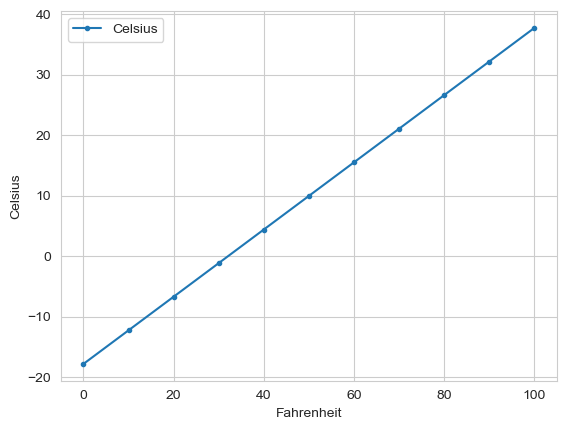

In [51]:
%matplotlib inline

c = lambda f: 5 / 9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')



Average High Temperature Forcasts Using Linear Regression and Machine Learning via Models

Importing the CSV data

In [52]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


Cleaning the Data by renaming the column headers and fixing the format of the date 

In [53]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [54]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


Descriptive Statistics

In [55]:
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Forecasting Future Temperatures

In [56]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)


Calling the slope of the line

In [57]:
linear_regression.slope

0.014771361132966163

Calling the y intercept

In [58]:
linear_regression.intercept

8.694993233674289

y = mx + b

In [59]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [60]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [61]:
linear_regression.slope * 2060 + linear_regression.intercept

39.123997167584584

Plotting the Points and Regression Line

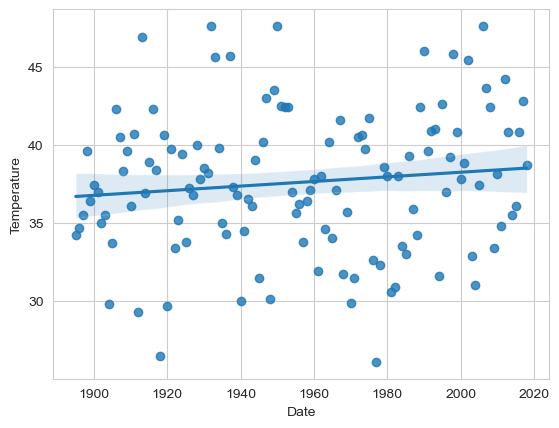

In [62]:
import seaborn as sns

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

(10.0, 70.0)

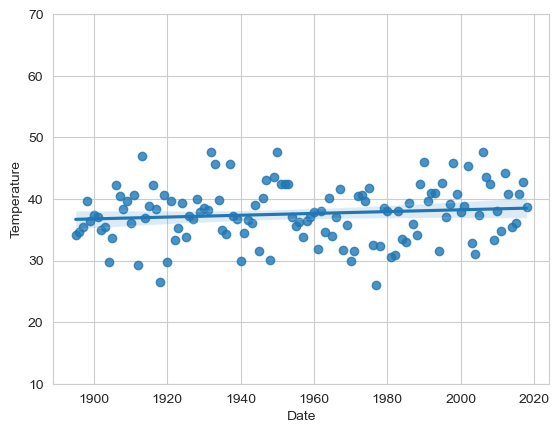

In [63]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

15.4 Scikit-learn estimator

In [64]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [66]:
X_train.shape

(93, 1)

In [67]:
X_test.shape

(31, 1)

Training the Model

In [68]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [69]:
linear_regression.coef_

array([0.01939167])

In [70]:
linear_regression.intercept_

-0.30779820252656265

Testing the Model

In [71]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


Predicting Future Temperatures and Estimating Past Temperatures

In [72]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [73]:
predict(1890)

array([36.34246432])

Visualizing the Dataset

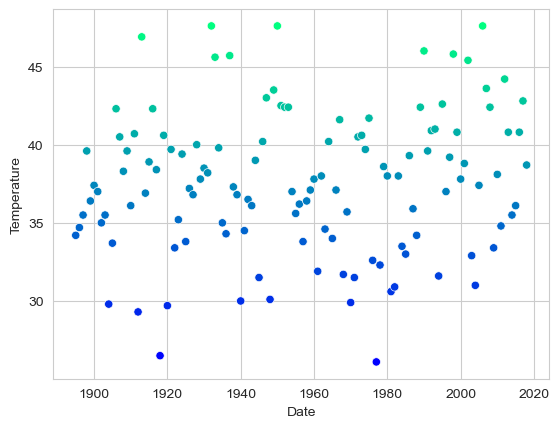

In [74]:
axes = sns.scatterplot(data=nyc, x="Date", y='Temperature', hue='Temperature', palette='winter', legend=False)

(10.0, 70.0)

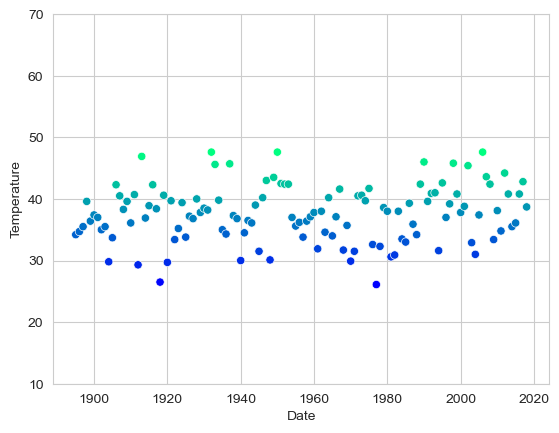

In [75]:
axes = sns.scatterplot(data=nyc, x="Date", y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

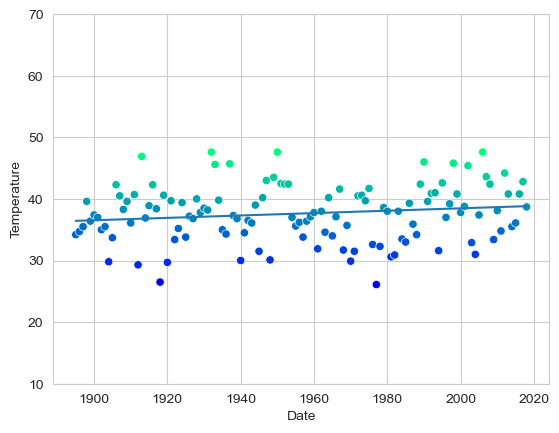

In [76]:
axes = sns.scatterplot(data=nyc, x="Date", y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

import matplotlib.pyplot as plt
line = plt.plot(x, y)

Comparison of the two methods